In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [3]:
from mkl_fft import fftn, ifftn
import cupy as cp
import cupyx.scipy.fft as cufft
import scipy.fft
import cupyx.scipy.ndimage as cuimage

In [4]:
# Create the job
job = Job('/mnt/md0/runs','AH007_2022-03-28_2-4-5', create=False, overwrite=False, verbosity = 10)
tifs, si_params, exp_str = flu.find_exp(job.params['subjects_dir'], job.params['subject'],
                                        job.params['date'], job.params['expnum'])

exp_dir = flu.find_expt_file((job.params['subject'], job.params['date'], job.params['expnum'][0]),
                         'root', dirs=[job.params['subjects_dir']])
offset_files = job.get_registered_files('registered_data', 'offset')

   Found and loaded params from /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/params.npy
SI ROI pix count in x is 182, which is impossible, setting it to 145


In [5]:
job.params['n_init_files'] = 3
job.params['n_init_frames'] = 300

In [6]:
# %%time
# job.run_init_pass()

In [7]:
summary = job.load_summary()
min_pix_vals = summary['min_pix_vals']
crosstalk_coeff = summary['crosstalk_coeff']
refs_and_masks = summary['refs_and_masks']
all_ops = summary['all_ops']

In [8]:
from suite3d import iter_step

In [9]:
job.make_new_dir('registered_fused_data')
job.params['gpu_reg_batchsize'] = 10
job.params['tif_batch_size'] = 1

      Found dir /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/registered_fused_data with tag registered_fused_data


In [31]:
job.register_gpu(tifs = job.tifs[:3])

      Found dir /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/registered_fused_data with tag registered_fused_data
Will analyze 3 tifs in 3 batches
   Enforcing positivity
   Launching IO thread
               [Thread] Loading batch 0 

      Loading /mnt/a2/AH007/2022-03-28/2/AH007_ROI3p33um_NOSCREEN_-400um_00001_00001.tif
         Memory at batch 0.  Total Used: 074.402 GB, Virtual Available: 428.813 GB, Virtual Used: 074.384 GB, Swap Used: 000.018 GB
Loading Batch 0 of 2


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 1.77 GB
               [Thread] Thread for batch 0 ready to join after 7.09 sec 

   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 076.218 GB, Virtual Available: 426.996 GB, Virtual Used: 076.200 GB, Swap Used: 000.018 GB
   Launching IO thread for next batch
               [Thread] Loading batch 1 

      Loading /mnt/a2/AH007/2022-03-28/2/AH007_ROI3p33um_NOSCREEN_-400um_00002_00001.tif
         After IO thread launch:Total Used: 077.925 GB, Virtual Available: 425.290 GB, Virtual Used: 077.907 GB, Swap Used: 000.018 GB
      Loaded batch of size (30, 26, 1202, 1015)
      Sending idx 0-10 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         Mov of shape 30, 10, 1254, 973; 2.73 GB
            GPU RAM: 3 blocks allocated, 3.55 / 3.59 GB used
         Allocating memory 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 1.14 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Subtracting crosstalk
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Mov of shape 30, 6, 1254, 973; 1.64 GB
            GPU RAM: 9 blocks allocated, 2.46 / 4.41 GB used
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


            GPU RAM: 9 blocks allocated, 3.27 / 4.41 GB used


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 1.21 sec
         Shifted batch in 0.15 sec
            GPU RAM: 8 blocks allocated, 3.27 / 4.41 GB used
         Freeing all blocks
            GPU RAM: 8 blocks allocated, 3.27 / 4.41 GB used
      Completed rigid registration in 3.93 sec
         Allocated GPU array for non-rigid reg in 0.26 sec
            Blocked movie is 3.96GB
            GPU RAM: 10 blocks allocated, 6.75 / 8.37 GB used
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.09 sec
            Iter 0: 17661/32400 blocks below SNR thresh
            Iter 1: 11326/32400 blocks below SNR thresh
            Iter 1: 9024/32400 blocks below SNR thresh
   Computed SNR and smoothed phase corrs in 0.13 sec
         Computed subpixel shifts in 0.01 sec
            GPU RAM: 12 blocks allocated, 6.79 / 8.37 GB used
      Computed non-rigid shifts in 4.53 sec
      Transferred to CPU in 0.25 sec
         Subtracting cros

         Registered batch in 0.02 sec
         Shifted batch in 0.25 sec
            GPU RAM: 9 blocks allocated, 4.91 / 5.00 GB used
         Freeing all blocks
            GPU RAM: 8 blocks allocated, 4.91 / 4.96 GB used
      Completed rigid registration in 0.81 sec
         Allocated GPU array for non-rigid reg in 0.20 sec
            Blocked movie is 6.59GB
            GPU RAM: 12 blocks allocated, 9.93 / 11.55 GB used
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.06 sec
            Iter 0: 25339/54000 blocks below SNR thresh
            Iter 1: 16895/54000 blocks below SNR thresh
            Iter 1: 13388/54000 blocks below SNR thresh
   Computed SNR and smoothed phase corrs in 0.29 sec
         Computed subpixel shifts in 0.02 sec
            GPU RAM: 12 blocks allocated, 10.00 / 11.00 GB used
      Computed non-rigid shifts in 1.38 sec
      Transferred to CPU in 0.35 sec
   Non rigid transfor

      Transferred to CPU in 0.34 sec
   Non rigid transformed (on CPU) in 1.88 sec
      Concatenating movie
         Concat in 3.45 sec
      Saving fused, registered file of shape (100, 30, 1254, 973) to /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/registered_fused_data/fused_reg_data0001.npy
         Memory at batch 2.  Total Used: 107.512 GB, Virtual Available: 395.703 GB, Virtual Used: 107.494 GB, Swap Used: 000.018 GB
Loading Batch 2 of 2


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 6.82 GB
               [Thread] Thread for batch 2 ready to join after 72.27 sec 

   Batch 2 IO thread joined
         Memory after IO thread joinTotal Used: 103.123 GB, Virtual Available: 400.092 GB, Virtual Used: 103.105 GB, Swap Used: 000.018 GB
      Loaded batch of size (30, 100, 1202, 1015)
      Sending idx 0-10 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.52 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         Mov of shape 30, 10, 1254, 973; 2.73 GB
            GPU RAM: 8 blocks allocated, 3.55 / 3.59 GB used
         Allocating memory for shifted movie
            GPU RAM: 8 blocks allocated, 4.91 / 4.96 GB used
         Registered batch in 0.02 sec
         Shifted batch in 0.25 sec
            GPU RAM: 9 blocks allocated, 4.91 / 5.00 GB used
         Freeing all blocks
            GPU RAM: 8 blocks allocated, 4.91 / 4.96 GB used


            Iter 0: 25309/54000 blocks below SNR thresh
            Iter 1: 16881/54000 blocks below SNR thresh
            Iter 1: 13325/54000 blocks below SNR thresh
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.02 sec
            GPU RAM: 12 blocks allocated, 10.00 / 10.73 GB used
      Computed non-rigid shifts in 1.45 sec
      Transferred to CPU in 0.35 sec
   Non rigid transformed (on CPU) in 1.88 sec
      Sending idx 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.51 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         Mov of shape 30, 10, 1254, 973; 2.73 GB
            GPU RAM: 8 blocks allocated, 3.55 / 3.59 GB used
         Allocating memory for shifted movie
            GPU RAM: 8 blocks allocated, 4.91 / 4.96 GB used
         Registered batch in 0.02 sec
         Shifted batch in 0.25 sec
            GPU

In [35]:
fmov = job.get_registered_movie('registered_fused_data','f', axis=0)

In [36]:
fmov.shape

(226, 30, 1254, 973)

In [44]:
fim = fmov.mean(axis=0).compute()

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7fb8ed0cf130>)

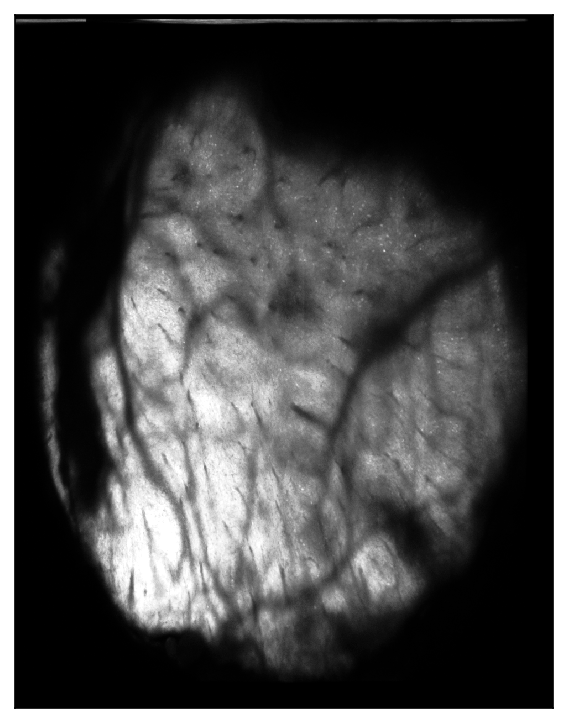

In [48]:
tfu.show_tif(fim[3])

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7fb8ed1509a0>)

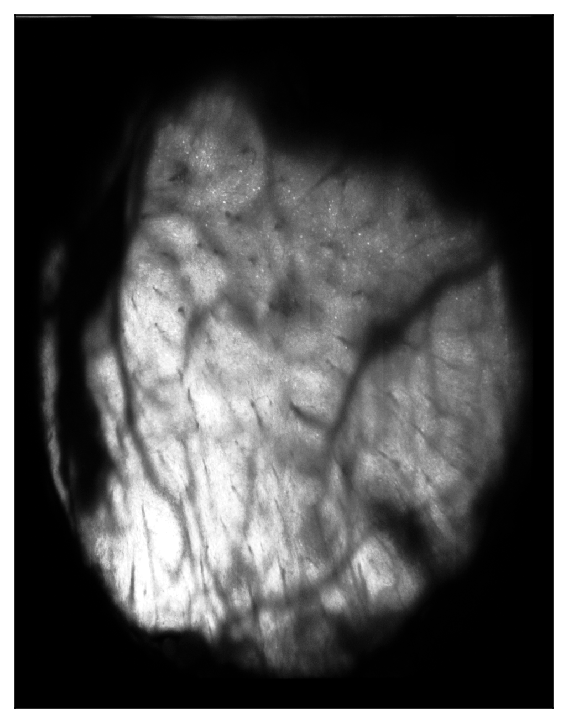

In [46]:
tfu.show_tif(fim[0])

In [33]:
job.make_new_dir('svd_test')

      Found dir /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/svd_test with tag svd_test


'/mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/svd_test'

In [34]:
job.svd_decompose_movie('svd_test', mov_shape_tfirst=True)

   Saved a copy of params at /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/svd_test
   Updated main params file
   Cropped to size (226, 20, 915, 870)
   Time-cropped to size (226, 20, 915, 870)
   Saved a copy of params at /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/svd_test
   Updated main params file
648 blocks with overlap (125 without, 5.18x increase)
   Will compute SVD in 648 blocks in a grid shaped (9, 9, 8)
   Batching 1 blocks together, for a total of 648 batches. Pix chunksize: 80000
   Saving SVD blocks in /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/svd_test/blocks
Starting with batch 0
      Starting batch 1 / 648, blocks 0 - 1
      Sending batch 1 to dask
      Dask completed in 4.786 sec
      Saving svd_info to /mnt/md0/runs/s3d-AH007_2022-03-28_2-4-5/svd_test/svd_info.npy
   Batch 1 completed in 4.808
   Estimated time remaining for 647 batches: 00h51m51s
      Starting batch 2 / 648, blocks 1 - 2
      Sending batch 2 to dask



KeyboardInterrupt



In [12]:
%%time
iter_step.register_dataset(job.tifs[3:5], job.params, job.dirs, summary, log_cb=job.log)

Will analyze 2 tifs in 2 batches
   Enforcing positivity
   Launching IO thread
                  [Thread] Loading batch 0 

      Loading /mnt/a2/AH007/2022-03-28/2/AH007_ROI3p33um_NOSCREEN_-400um_00002_00003.tif
         Start Batch:        Total Used: 060.446 GB, Virtual Available: 442.769 GB, Virtual Used: 060.427 GB, Swap Used: 000.018 GB
Loading Batch 1 of 2


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 6.82 GB
                  [Thread] Loaded batch 0 

                  [Thread] Thread for batch 0 ready to join 

   Batch 0 IO thread joined
         After IO thread joinTotal Used: 067.358 GB, Virtual Available: 435.857 GB, Virtual Used: 067.340 GB, Swap Used: 000.018 GB
   Subtracting min vals to enfore positivity
         After Sharr creation:Total Used: 074.188 GB, Virtual Available: 429.027 GB, Virtual Used: 074.170 GB, Swap Used: 000.018 GB
   Launching IO thread for next batch
                  [Thread] Loading batch 1 

      Loading /mnt/a2/AH007/2022-03-28/2/AH007_ROI3p33um_NOSCREEN_-400um_00002_00004.tif
         After IO thread launch:Total Used: 074.188 GB, Virtual Available: 429.027 GB, Virtual Used: 074.170 GB, Swap Used: 000.018 GB
      Subtracting plane 1 from 16
      Subtracting plane 2 from 17
      Subtracting plane 3 from 18
      Subtracting plane 4 from 19
      Subtracting plane 5 from 20
      Subtracting plane 6 from 21
      Subtra

In [63]:
raw_img = summary['raw_img']
img_sub = summary['img']

In [7]:
__, xs = lbmio.load_and_stitch_full_tif_mp(job.tifs[0], channels=n.arange(1), get_roi_start_pix=True)
xs = n.sort(xs)

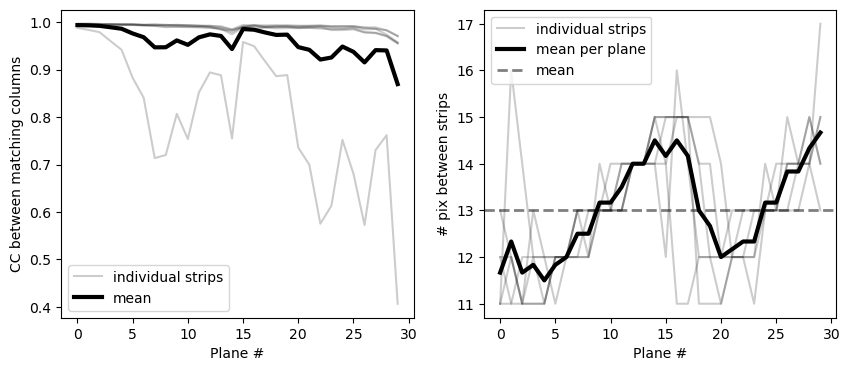

In [18]:
best_shifts, ccm = utils.get_fusing_shifts(raw_img, xs)

In [16]:
init_mov = lbmio.load_and_stitch_tifs(job.tifs[:1], planes = job.params['planes'])

Loading /mnt/a2/AH007/2022-03-28/2/AH007_ROI3p33um_NOSCREEN_-400um_00001_00001.tif
Loaded 1 files, total 1.77 GB


In [53]:
summary['crosstalk_coeff']

0.291

In [36]:
summary['fuse_shift']

13

In [ ]:
# plane_shifts = summary['plane_shifts'].copy()

In [105]:
# sub_shifts = n.concatenate([[0,0],utils.get_shifts_3d(img_sub,job.params['reg_filter_pcorr']])
# plane_shifts = n.concatenate([[[0,0]], sub_shifts])

In [56]:
best_shift = int(n.round(best_shifts.mean()))


if job.params.get('fix_shallow_plane_shift_estimates', True):
    peaks = n.abs(plane_shifts[10:15]).max(axis=0)
    plane_shifts[20:][plane_shifts[20:] > peaks] = 0

In [166]:
pad_mov = pad_and_fuse(init_mov, plane_shifts, best_shift, xs)

In [164]:
def pad_and_fuse(mov, plane_shifts, fuse_shift, xs):
    nz, nt, nyo, nxo = mov.shape
    n_stitches = len(xs) - 1
    n_xpix_lost_for_fusing = n_stitches * best_shift

    plane_shifts = n.round(plane_shifts).astype(int)

    xrange = plane_shifts[:,0].min(), plane_shifts[:,0].max()
    yrange = plane_shifts[:,1].min(), plane_shifts[:,1].max()

    ypad = n.ceil(n.abs(yrange)).astype(int)[::-1]
    xpad = n.ceil(n.abs(xrange)).astype(int)[::-1]
    nyn = nyo + ypad.sum()
    nxn = nxo + xpad.sum() - n_xpix_lost_for_fusing

    mov_pad = n.zeros((nz,nt,nyn,nxn), n.float32)

    lshift = best_shift // 2
    rshift = best_shift - lshift
    xn0 = 0
    for i in range(n_stitches):
        x0, x1 = xs[i], xs[i+1]
        if i > 0: x0 += lshift
        if i < n_stitches-1: x1 -= rshift
        dx = x1 - x0
#         print(x0,x1)
        mov_pad[:,:,:ny, xn0:xn0+dx] = init_mov[:,:,:,x0:x1]
        xn0 += dx
    return mov_pad

6

In [146]:
mov_pad.shape

(30, 26, 1254, 975)

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f8cf22b1ee0>)

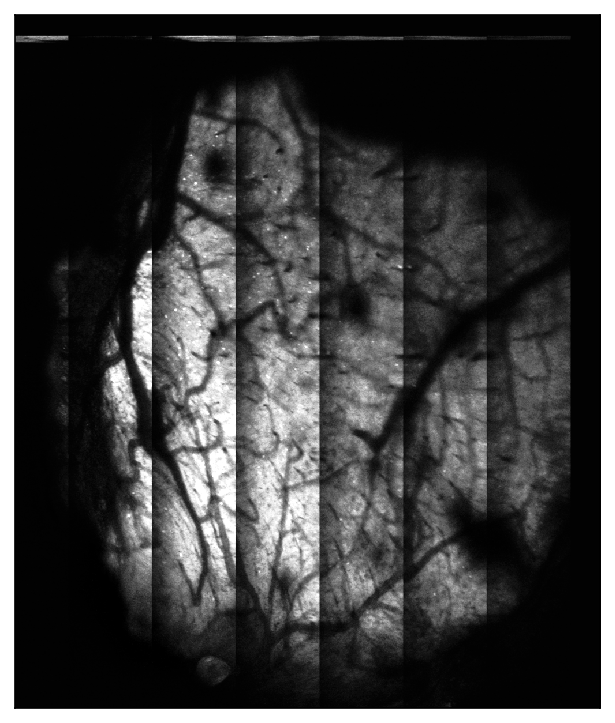

In [135]:
tfu.show_tif(summary['ref_img_3d'][14])

In [287]:
crosses = []
for dx in dxs:
    lx = lstrip[:,-dx:]
    rx = rstrip[:, :dx]

    lrx = (lx * rx).sum(axis=-1)
    norm = n.linalg.norm(lx,axis=1) * n.linalg.norm(rx,axis=1)

    cross = lrx / norm
    crosses.append(cross)
crosses = n.array(crosses)

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f1fff7c4f40>)

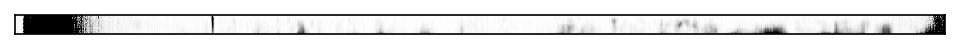

In [268]:
tfu.show_tif(crosses, vminmax=(0.9,1))

In [269]:
argmaxs = crosses.argmax(axis=0)

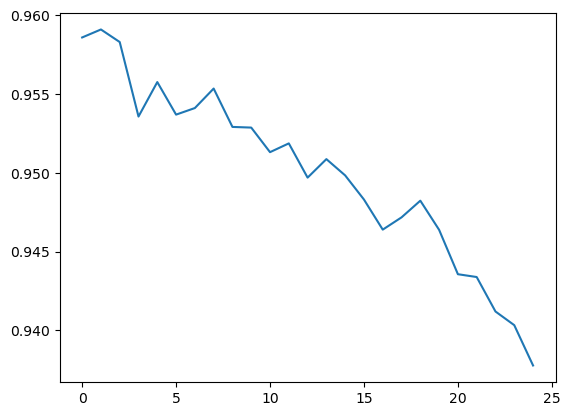

In [276]:
plt.plot(crosses.mean(axis=-1))

In [275]:
crosses.shape

(25, 1202)

In [270]:
maxs = crosses.max(axis=0)

(array([856., 173., 101.,  17.,  12.,  20.,   6.,  10.,   3.,   4.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

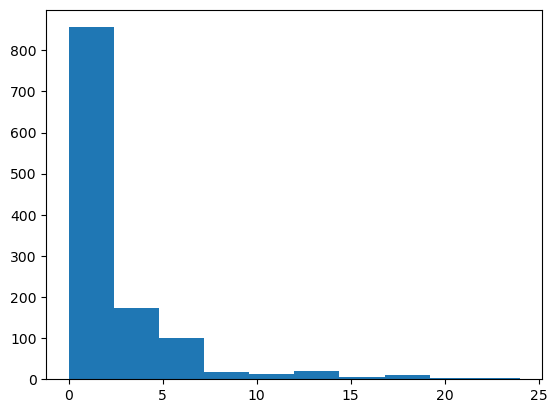

In [271]:
plt.hist(argmaxs)

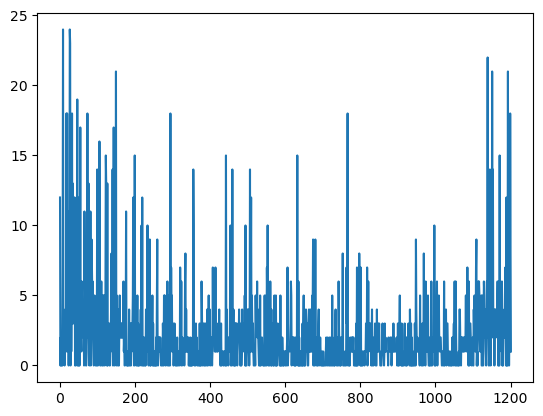

In [272]:
plt.plot(argmaxs)

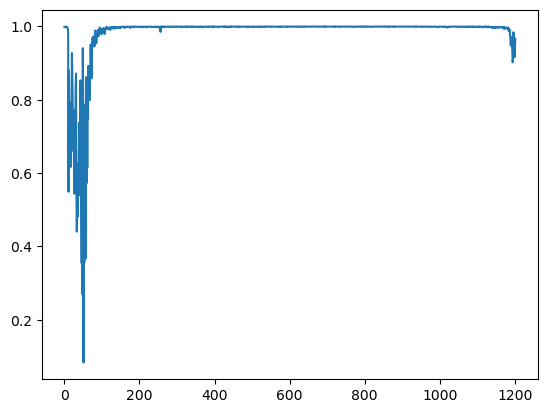

In [273]:
plt.plot(maxs)


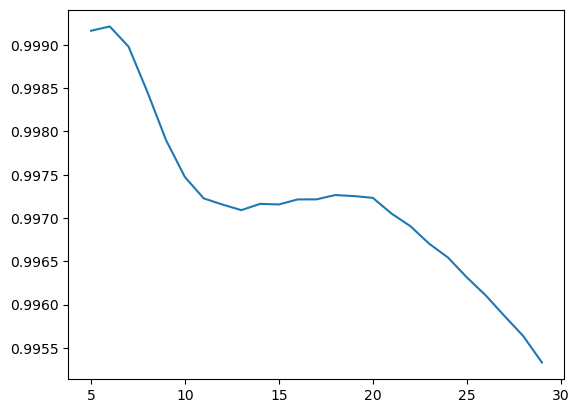

In [274]:
plt.plot(dxs, crosses[:,600:700].mean(axis=1))

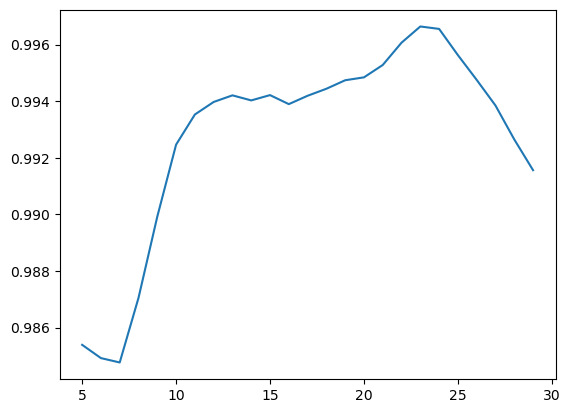

In [234]:
plt.plot(dxs, crosses[:,600:610].mean(axis=1))

In [155]:
crosses.shape

(25, 1202)

In [ ]:
lx**2.sum(a)

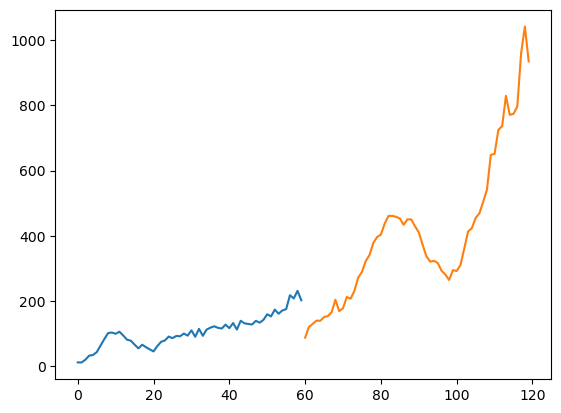

In [114]:
yidx = 900
plt.plot(n.arange(n_strip), lstrip[yidx])
plt.plot(n.arange(n_strip) + n_strip, rstrip[yidx])

In [115]:
import mkl_fft as fft

In [116]:
lstrip_f = fft.fft(lstrip,axis=1)
rstrip_f = fft.fft(rstrip,axis=1)

In [117]:
cc = fft.ifft(lstrip_f * rstrip_f,axis=1)

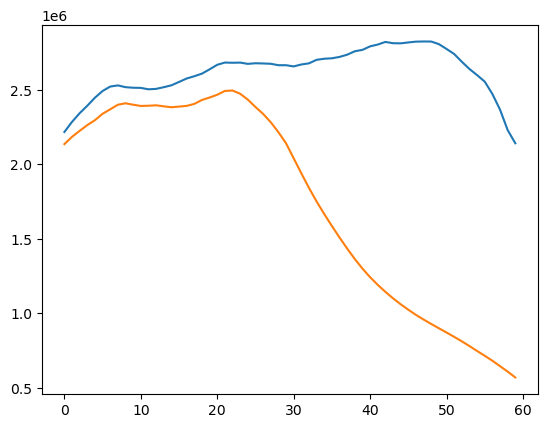

In [123]:
plt.plot(cc.real[900])
plt.plot(n.convolve(lstrip[900,], rstrip[900,], mode='same')[::-1])

In [31]:
raw_img.shape

(30, 1202, 1015)

In [28]:
xs.shape

(7,)

In [7]:
mov_raw = lbmio.load_and_stitch_tifs(job.tifs[:1], planes = n.arange(cz[0],cz[1]))[:,:,cy[0]:cy[1], cx[0]:cx[1]]
mov_raw = mov_raw[:,ct[0]:ct[1]]

Loading /mnt/a2/AH007/2022-03-28/2/AH007_ROI3p33um_NOSCREEN_-400um_00001_00001.tif
Loaded 1 files, total 1.48 GB


In [123]:
%%time

CPU times: user 52.4 ms, sys: 80.6 ms, total: 133 ms
Wall time: 133 ms


In [8]:
from suite3d import iter_step

In [124]:
%%time
mov_pos = mov_raw - min_pix_vals.reshape(len(min_pix_vals), 1, 1, 1)[cz[0]:cz[1],].astype(mov_raw.dtype)
shmem_mov,shmem_mov_params, mov = utils.create_shmem_from_arr(mov_pos, copy=True)
__ = iter_step.subtract_crosstalk(shmem_mov_params, crosstalk_coeff, planes = n.arange(*cz))
all_offsets = iter_step.register_mov(mov,refs_and_masks, all_ops)
mov_out_cpu = mov.copy()
shmem_mov.close()
shmem_mov.unlink()

Subtracting plane 1 from 16
Subtracting plane 2 from 17
Subtracting plane 3 from 18
Subtracting plane 4 from 19
Subtracting plane 5 from 20
Subtracting plane 6 from 21
Subtracting plane 7 from 22
Subtracting plane 8 from 23
Subtracting plane 9 from 24
Registering plane 0
Registering plane 1
Registering plane 2
Registering plane 3
Registering plane 4
Registering plane 5
Registering plane 6
Registering plane 7
Registering plane 8
Registering plane 9
Registering plane 10
Registering plane 11
Registering plane 12
Registering plane 13
Registering plane 14
Registering plane 15
Registering plane 16
Registering plane 17
Registering plane 18
Registering plane 19
Registering plane 20
Registering plane 21
Registering plane 22
Registering plane 23
Registering plane 24
CPU times: user 2min 48s, sys: 4min 57s, total: 7min 46s
Wall time: 11.2 s


In [125]:
xmaxs_rr_cpu = n.stack(all_offsets['xms'],axis=0)
ymaxs_rr_cpu = n.stack(all_offsets['yms'],axis=0)
xmaxs_nr_cpu = n.stack(all_offsets['xm1s'],axis=1)
ymaxs_nr_cpu = n.stack(all_offsets['ym1s'],axis=1)

In [13]:
%%time
mask_mul, mask_offset, ref_2ds = n.stack([r[:3] for r in refs_and_masks],axis=1)[:,cz[0]:cz[1], cy[0]:cy[1], cx[0]:cx[1]]
mask_mul_nr, mask_offset_nr, ref_nr = n.stack([r[3:] for r in refs_and_masks],axis=1)[:,cz[0]:cz[1], cy[0]:cy[1], cx[0]:cx[1]]
rmins = n.array([op['rmin'] for op in all_ops])
rmaxs = n.array([op['rmax'] for op in all_ops])

CPU times: user 617 ms, sys: 776 ms, total: 1.39 s
Wall time: 1.39 s


In [14]:
from suite3d import register_gpu as rgpu 
from suite2p.registration import nonrigid as s2pnr
from suite2p.registration import rigid as s2prr

In [113]:
ops = all_ops[0]
snr_thresh = ops['snr_thresh']
NRsm = ops['NRsm'].astype(n.float32)
yblocks, xblocks = ops['yblock'], ops['xblock']
nblocks = ops['nblocks']
max_shift_nr = 5
max_shift_rr = 60
subpixel = 10
n_smooth_iters = 2
npad = 3

In [114]:
mempool = cp.get_default_memory_pool()

In [126]:

mov_pos = mov_raw - min_pix_vals.reshape(len(min_pix_vals), 1, 1, 1)[cz[0]:cz[1],].astype(mov_raw.dtype)

In [127]:
min_pix_vals.dtype

dtype('int64')

In [129]:
mov_pos.shape

(25, 10, 1202, 1015)

In [130]:
min_pix_vals.shape

(30,)

In [128]:
mov_raw.dtype

dtype('int16')

In [88]:
summary['all_ops']

In [132]:
%%time
mov_shifted, ymaxs_rr, xmaxs_rr = rgpu.rigid_2d_reg_gpu(mov_raw, mask_mul, mask_offset, ref_2ds, shift=True,
                                                 max_reg_xy = max_shift_rr, rmins=rmins, rmaxs=rmaxs, 
                                                crosstalk_coeff=crosstalk_coeff, min_pix_vals=min_pix_vals)
# mov_shifted = cp.asarray(mov_rr_cpu, cp.float32).swapaxes(0,1)
mov_rr_gpu = mov_shifted.get()
nt,nz,ny,nx = mov_shifted.shape
mempool.free_all_blocks()
ymaxs_nr, xmaxs_nr, snrs = rgpu.nonrigid_2d_reg_gpu(mov_shifted, mask_mul_nr[:,:,0], mask_offset_nr[:,:,0], ref_nr[:,:,0], 
                                              yblocks, xblocks, snr_thresh, NRsm, rmins, rmaxs, max_shift=max_shift_nr, 
                                              npad=npad, n_smooth_iters=n_smooth_iters, subpixel = subpixel)
ymaxs_nr_gpu = ymaxs_nr.get()
xmaxs_nr_gpu = xmaxs_nr.get()
ymaxs_rr_gpu = ymaxs_rr.get(); 
xmaxs_rr_gpu = xmaxs_rr.get()
mov_cpu = mov_shifted.get()
mov_out_gpu = n.zeros_like(mov_cpu)
for zidx in range(nz):
    mov_out_gpu[:,zidx] = s2pnr.transform_data(mov_cpu[:,zidx], nblocks, xblock=xblocks, yblock=yblocks, 
                                       ymax1=ymaxs_nr_gpu[:,zidx], xmax1=xmaxs_nr_gpu[:,zidx])
mempool.free_all_blocks()

Loaded mov and masks to GPU for rigid reg in 0.72 sec
Subtracting min pix vals to enforce positivity
Subtracting crosstalk
Allocating memory for shifted movie
GPU RAM: 6 blocks allocated, 5.23 / 5.47 GB used
Registering plane 0
Shifting plane 0
Registering plane 1
Shifting plane 1
Registering plane 2
Shifting plane 2
Registering plane 3
Shifting plane 3
Registering plane 4
Shifting plane 4
Registering plane 5
Shifting plane 5
Registering plane 6
Shifting plane 6
Registering plane 7
Shifting plane 7
Registering plane 8
Shifting plane 8
Registering plane 9
Shifting plane 9
Registering plane 10
Shifting plane 10
Registering plane 11
Shifting plane 11
Registering plane 12
Shifting plane 12
Registering plane 13
Shifting plane 13
Registering plane 14
Shifting plane 14
Registering plane 15
Shifting plane 15
Registering plane 16
Shifting plane 16
Registering plane 17
Shifting plane 17
Registering plane 18
Shifting plane 18
Registering plane 19
Shifting plane 19
Registering plane 20
Shifting pl

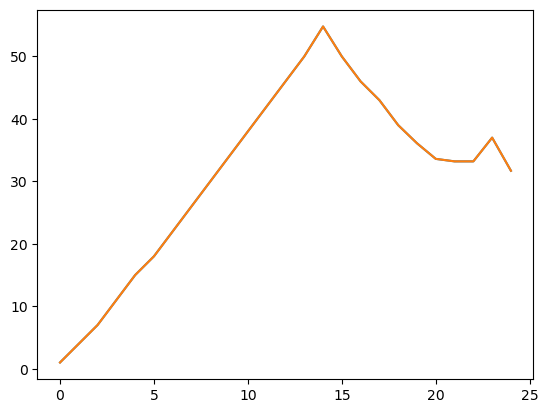

In [133]:
plt.plot(xmaxs_rr_cpu.mean(axis=1))
plt.plot(xmaxs_rr_gpu.mean(axis=1))

(None, <Axes: >, <matplotlib.image.AxesImage at 0x7f8190b9d9d0>)

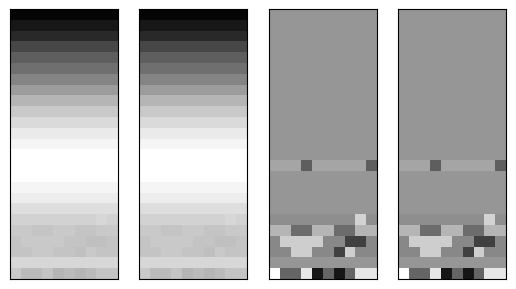

In [147]:
f,axs = plt.subplots(1,4)
vx0 = (0,50)
tfu.show_tif(xmaxs_rr_gpu,ax=axs[0], vminmax=vx0)
tfu.show_tif(xmaxs_rr_cpu,ax=axs[1], vminmax=vx0)
vx1 = (-2,2)
tfu.show_tif(xmaxs_rr_gpu-xmaxs_rr_gpu.mean(axis=1,keepdims=True),ax=axs[0+2], vminmax=vx1)
tfu.show_tif(xmaxs_rr_cpu-xmaxs_rr_cpu.mean(axis=1,keepdims=True),ax=axs[1+2], vminmax=vx1)

In [149]:
snrs = snrs.get()
errs = n.abs(xmaxs_nr_cpu - xmaxs_nr_gpu).mean(axis=0)
errs_t = n.abs(xmaxs_nr_cpu - xmaxs_nr_gpu)

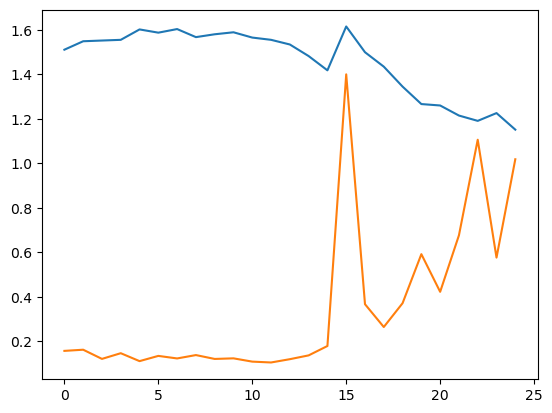

In [150]:
plt.plot(snrs.mean(axis=(0,2)))
plt.plot(errs_t.mean(axis=(0,2)))

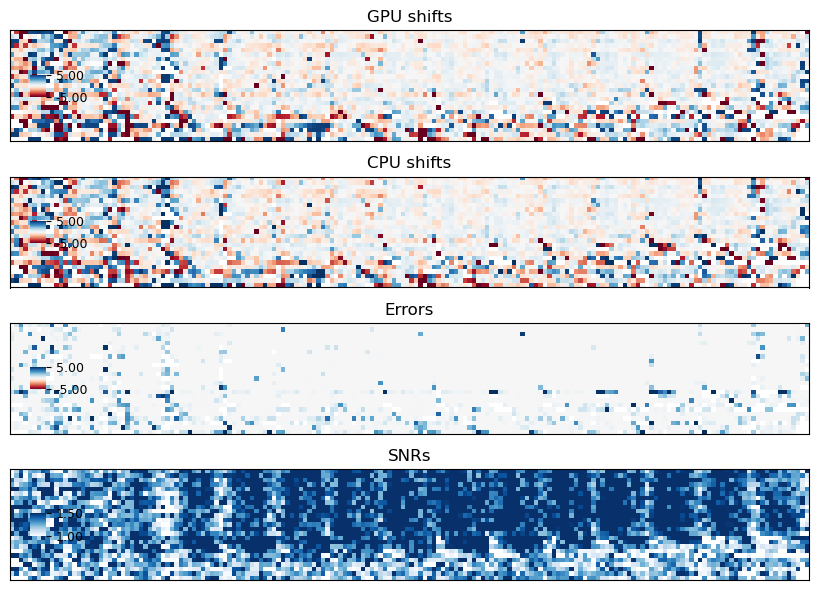

In [151]:
f,axs = plt.subplots(4,1, figsize=(16,6))
tidx = 5
snr_vis_thresh = 1.0
vx0 = (-5,5)
cmap='RdBu'
snr_mask = (snrs > snr_vis_thresh).astype(float)
tfu.show_tif(xmaxs_nr_gpu[tidx],ax=axs[0], vminmax=vx0, alpha=snr_mask[tidx], cmap=cmap, cbar=True)
axs[0].set_title("GPU shifts")
tfu.show_tif(xmaxs_nr_cpu[tidx],ax=axs[1], vminmax=vx0, alpha=snr_mask[tidx], cmap=cmap, cbar=True)
axs[1].set_title("CPU shifts")
tfu.show_tif(errs_t[tidx],ax=axs[2], vminmax=vx0, alpha=snr_mask[tidx], cmap=cmap, cbar=True)
axs[2].set_title("Errors")
tfu.show_tif(snrs[tidx],ax=axs[3], vminmax=(1.0, 1.5), alpha=snr_mask[tidx], cmap='Blues', cbar=True)
axs[3].set_title("SNRs")
plt.tight_layout()

In [137]:
snrs_sq = snrs.reshape(nt, nz, *nblocks)

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f81f6bb6bb0>)

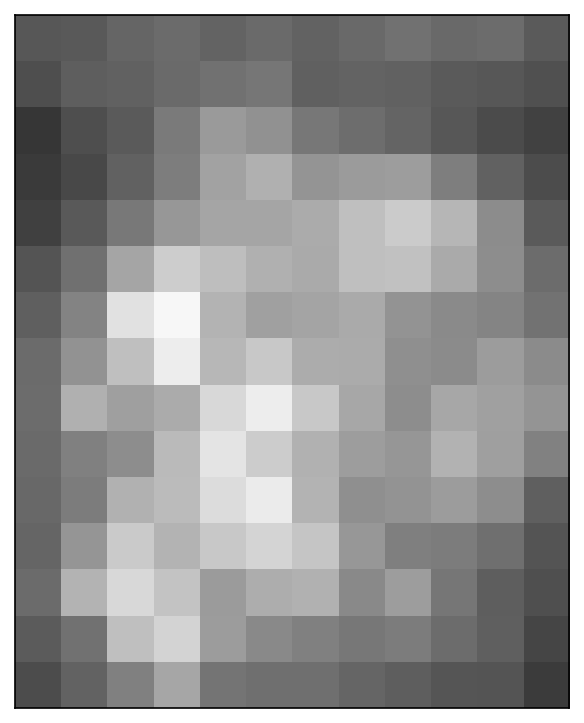

In [138]:
tfu.show_tif(snrs_sq.mean(axis=(0,1)), vminmax=(1.0,2.0))

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f81bb1bd310>)

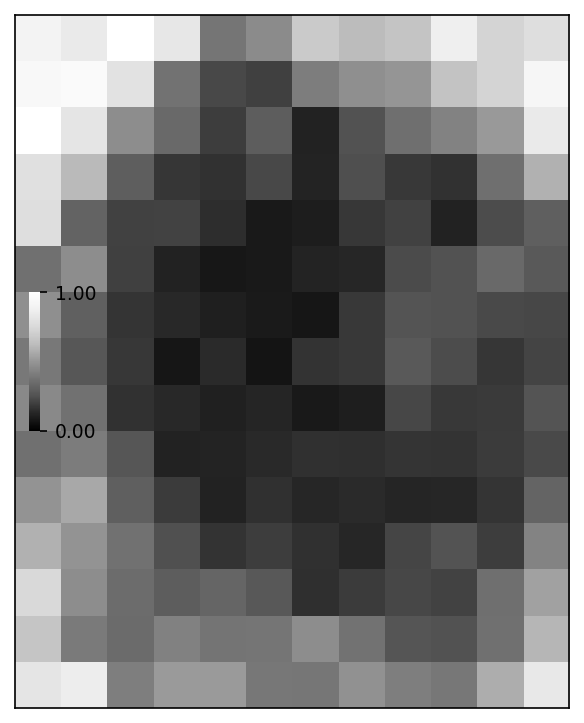

In [139]:
tfu.show_tif(errs.mean(axis=0).reshape(*nblocks), vminmax=(0,1.0),cbar=True)

In [11]:
import copy

%%time
shmem_mov,shmem_mov_params, mov = utils.create_shmem_from_arr(mov_pos, copy=True)
__ = iter_step.subtract_crosstalk(shmem_mov_params, crosstalk_coeff, planes = n.arange(*cz))
rigid_ops = []
for ops in all_ops:
    rigid_ops.append(copy.deepcopy(ops))
    rigid_ops[-1]['nonrigid']=False
__ = iter_step.register_mov(mov,refs_and_masks, rigid_ops)
mov_rr_cpu = mov.copy()
shmem_mov.close()
shmem_mov.unlink()